<a href="https://colab.research.google.com/github/oghenerosiloko/Predictions-with-Colab/blob/main/ETH_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#Installing dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use("bmh")

In [28]:
from google.colab import files
uploaded = files.upload()

Saving ETH-USD.csv to ETH-USD.csv


In [29]:
eth=pd.read_csv("ETH-USD.csv")

In [30]:
eth

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,133.418152,141.397507,132.650711,140.819412,140.819412,2258709868
1,2019-01-02,141.519516,156.929138,140.650955,155.047684,155.047684,3328240369
2,2019-01-03,155.196045,155.863052,147.198364,149.135010,149.135010,2676164880
3,2019-01-04,148.912888,156.878983,147.907104,154.581940,154.581940,3126192535
4,2019-01-05,154.337418,160.824890,154.337418,155.638596,155.638596,3338211928
...,...,...,...,...,...,...,...
696,2020-11-27,519.108093,530.777161,497.242615,517.493713,517.493713,16831105702
697,2020-11-28,517.597351,548.044861,508.125366,538.229797,538.229797,14770243833
698,2020-11-29,538.264587,576.602417,531.987549,575.758057,575.758057,15017517758
699,2020-11-30,575.757080,615.240540,571.537781,614.842529,614.842529,20276867832


In [31]:
eth.shape

(701, 7)

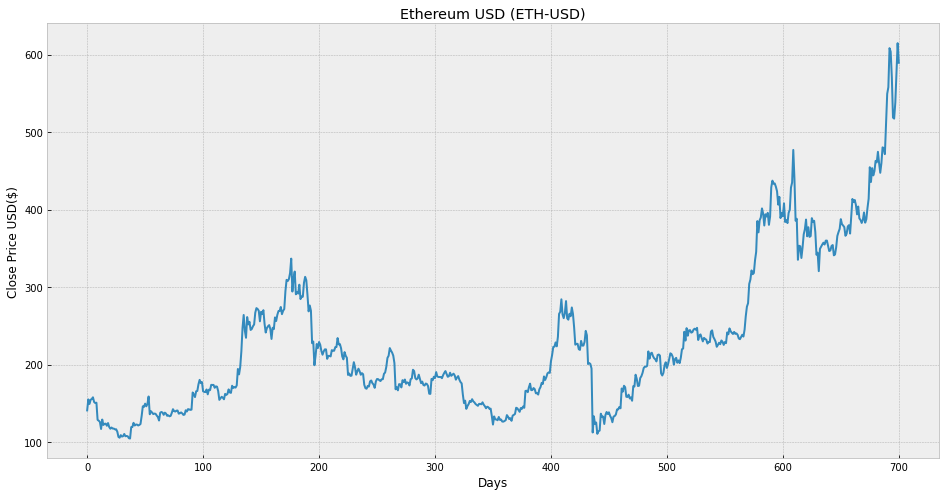

In [32]:
#Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Ethereum USD (ETH-USD)')
plt.xlabel("Days")
plt.ylabel("Close Price USD($)")
plt.plot(eth["Close"])
plt.show()

In [33]:
#Get and focus on the close price
eth=eth[["Close"]]

In [34]:
eth.head(10)

,Close
0,140.819412
1,155.047684
2,149.135010
3,154.581940
4,155.638596
5,157.746201
6,151.699219
7,150.359634
8,150.803116
9,128.625183


In [35]:
#lets create a variable to predict x days into the future
future_days= 25
#create a new target column (shifted x ) units /days up
eth["prediction"] = eth[["Close"]].shift(-future_days)
eth.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,prediction
0,140.819412,116.488739
1,155.047684,113.405289
2,149.135010,106.589973
3,154.581940,105.598213
4,155.638596,108.907539
5,157.746201,107.061012
6,151.699219,107.609787
7,150.359634,110.430260
8,150.803116,107.492668
9,128.625183,107.821602


In [36]:
eth.tail(10)

,Close,prediction
691,558.068115,NaN
692,608.454041,NaN
693,603.897766,NaN
694,570.686646,NaN
695,518.801147,NaN
696,517.493713,NaN
697,538.229797,NaN
698,575.758057,NaN
699,614.842529,NaN
700,589.566833,NaN


In [37]:
#Create the future data set x and covert it to a numpy array and remove the last x rows/days
x= np.array(eth.drop(["prediction"], 1))[:-future_days]
print(x)

[[140.819412]
 [155.047684]
 [149.13501 ]
 [154.58194 ]
 [155.638596]
 [157.746201]
 [151.699219]
 [150.359634]
 [150.803116]
 [128.625183]
 [127.548325]
 [125.96653 ]
 [116.897804]
 [129.068726]
 [122.032715]
 [123.547058]
 [123.74192 ]
 [121.010262]
 [124.51902 ]
 [119.474831]
 [117.157852]
 [118.747551]
 [117.452606]
 [117.362885]
 [116.378342]
 [116.488739]
 [113.405289]
 [106.589973]
 [105.598213]
 [108.907539]
 [107.061012]
 [107.609787]
 [110.43026 ]
 [107.492668]
 [107.821602]
 [107.44352 ]
 [104.919289]
 [104.535301]
 [119.267746]
 [119.430885]
 [124.806488]
 [121.298393]
 [122.572289]
 [122.553604]
 [121.390205]
 [122.100388]
 [123.260216]
 [133.598877]
 [146.098373]
 [145.346176]
 [149.554337]
 [146.130844]
 [149.092453]
 [158.795425]
 [135.852661]
 [139.822861]
 [138.089676]
 [136.125961]
 [136.746246]
 [136.443619]
 [134.206955]
 [132.24942 ]
 [127.774124]
 [137.822388]
 [138.789352]
 [138.0345  ]
 [135.127075]
 [137.965332]
 [136.758682]
 [133.83403 ]
 [134.442886]
 [133.

In [38]:
#Create target data set y and convert it to a numpy array and get all the target values except the last prediction
y = np.array(eth["prediction"])[:-future_days]
print (y)

[116.488739 113.405289 106.589973 105.598213 108.907539 107.061012
 107.609787 110.43026  107.492668 107.821602 107.44352  104.919289
 104.535301 119.267746 119.430885 124.806488 121.298393 122.572289
 122.553604 121.390205 122.100388 123.260216 133.598877 146.098373
 145.346176 149.554337 146.130844 149.092453 158.795425 135.852661
 139.822861 138.089676 136.125961 136.746246 136.443619 134.206955
 132.24942  127.774124 137.822388 138.789352 138.0345   135.127075
 137.965332 136.758682 133.83403  134.442886 133.263077 133.711594
 137.691788 142.398178 140.000549 139.374603 140.519196 140.686356
 136.636063 137.181442 138.239868 136.986923 135.031021 135.460358
 140.988159 139.416473 142.497421 142.092682 141.514099 141.830322
 163.961746 161.458801 158.052536 165.514847 165.947205 174.531647
 180.25882  176.114578 177.337479 165.497025 164.736328 164.513351
 167.838516 161.574173 167.623444 166.95076  173.814026 173.708435
 173.751266 170.046524 171.874664 171.4478   165.826096 154.45

In [39]:
#split data into 75% taring and 25% testing
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size = 0.025)

In [40]:
# Create the Models
#Creat the decision tree regressor model
tree= DecisionTreeRegressor().fit(x_train, y_train)
#Create  the linear regression model
lr= LinearRegression().fit(x_train, y_train)

In [41]:
#Get the last x rows of the future data set
x_future = eth.drop(["prediction"], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[381.190765],
       [379.484039],
       [377.441833],
       [366.229004],
       [368.855927],
       [378.213684],
       [379.935608],
       [369.136902],
       [392.189972],
       [413.77298 ],
       [409.766693],
       [412.457611],
       [406.217773],
       [393.888306],
       [403.99704 ],
       [388.650757],
       [386.730103],
       [382.819977],
       [386.590332],
       [396.358185],
       [383.156738],
       [387.602173],
       [402.141998],
       [414.067352],
       [454.719299]])

In [42]:
#show the model tree prediction
tree_prediction= tree.predict(x_future)
print (tree_prediction)
print()

#show the model linear  regression prediction
lr_prediction= lr.predict(x_future)
print(lr_prediction)

[435.713135 453.554779 444.163055 449.679626 462.960541 461.00528
 474.626434 460.149841 447.559082 459.940308 480.360077 479.48407
 471.630432 509.744568 549.486633 558.068115 608.454041 603.897766
 570.686646 518.801147 517.493713 454.719299 575.758057 614.842529
 589.566833]

[390.4054907  388.7527013  386.77503388 375.916557   378.46046297
 387.52249255 389.18999965 378.73255849 401.05709654 421.95803006
 418.07835127 420.68422985 414.6415856  402.70175914 412.49103306
 397.62972917 395.76977241 391.98321571 395.63441851 405.09358408
 392.30933426 396.61428292 410.69461481 422.2430992  461.6103478 ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


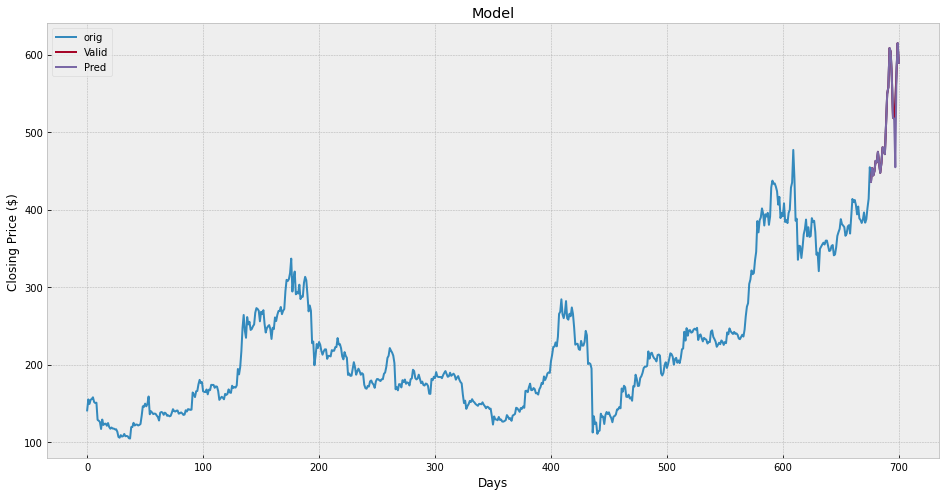

In [43]:
#Lets visualize the data
predictions = tree_prediction

valid = eth[x.shape[0]:]
valid["predictions"] = predictions
plt.figure(figsize=(16,8))
plt.title ("Model")
plt.xlabel("Days")
plt.ylabel("Closing Price ($)")
plt.plot(eth["Close"])
plt.plot(valid[["Close", "predictions"]])
plt.legend(["orig", "Valid", "Pred"])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


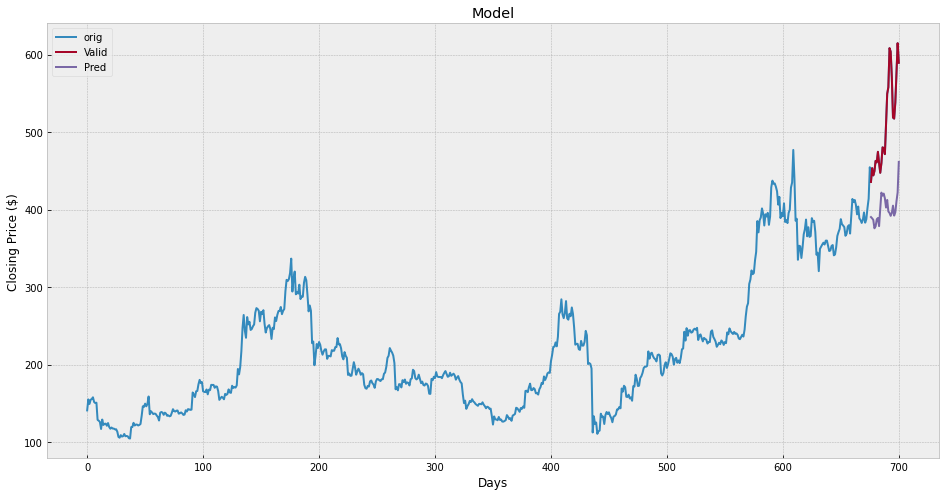

In [44]:
#Lets visualize the data
predictions = lr_prediction

valid = eth[x.shape[0]:]
valid["predictions"] = predictions
plt.figure(figsize=(16,8))
plt.title ("Model")
plt.xlabel("Days")
plt.ylabel("Closing Price ($)")
plt.plot(eth["Close"])
plt.plot(valid[["Close", "predictions"]])
plt.legend(["orig", "Valid", "Pred"])
plt.show()